# Kyle Burt
## 4 New NHL Divisions Due to Covid-19 and Their Performance eThe NHL was forced to created 4 divisions to geographically split up the teams. The North division comprised of all the Canadian teams was seen as the “weakest” division. I want to put this to the test, I will do this through comparing the North Divisions stats described below, and the other three American divisions seen as the “stronger” divisions.  his will be able to provide clarity on if Covid-19 divisions affect outcomes of the NHL.e.


 - Compare the top four playoff teams in each division and run an analysis on all of them combined to see how division strength. 
 - Look at a single team in each division( or only 1 division) and see how they play when their Time on Ice is < 50 min and see if they save % scoring chances % was higher etc.. 
 - Look at the top two teams in what was considered the weakest division (North) and 
 - Compare the stats of some of the best and worst teams? 
 
 

In [ ]:
import pandas as pd
data = pd.read_csv("../data/raw/Games - Natural Stat TrickTeam Season Totals - Natural Stat Trick.csv")
data


,Game,Team,Unnamed: 2,TOI,CF,CA,CF%,SCF,SCA,SCF%,SH%,SV%,PDO
0,"2021-01-13 - Blackhawks 1, Lightning 5",Chicago Blackhawks,Limited ReportFull Report,45.583333,33,34,49.25,19,24,44.19,0.00,86.36,0.864
1,"2021-01-13 - Blackhawks 1, Lightning 5",Tampa Bay Lightning,Limited ReportFull Report,45.583333,34,33,50.75,24,19,55.81,13.64,100.00,1.136
2,"2021-01-13 - Blues 4, Avalanche 1",Colorado Avalanche,Limited ReportFull Report,50.683333,44,43,50.57,11,22,33.33,0.00,85.19,0.852
3,"2021-01-13 - Blues 4, Avalanche 1",St Louis Blues,Limited ReportFull Report,50.683333,43,44,49.43,22,11,66.67,14.81,100.00,1.148
4,"2021-01-13 - Canadiens 4, Maple Leafs 5",Montreal Canadiens,Limited ReportFull Report,48.600000,47,52,47.47,25,30,45.45,9.09,90.00,0.991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,"2021-05-16 - Flames 6, Canucks 5",Vancouver Canucks,Limited ReportFull Report,40.966667,32,50,39.02,17,19,47.22,8.70,78.26,0.870
1732,"2021-05-18 - Flames 2, Canucks 4",Calgary Flames,Limited ReportFull Report,47.416667,43,37,53.75,25,17,59.52,3.33,86.36,0.897
1733,"2021-05-18 - Flames 2, Canucks 4",Vancouver Canucks,Limited ReportFull Report,47.416667,37,43,46.25,17,25,40.48,13.64,96.67,1.103
1734,"2021-05-19 - Canucks 2, Flames 6",Calgary Flames,Limited ReportFull Report,44.483333,43,35,55.13,30,18,62.50,24.00,94.44,1.184


# Task 1: Conduct a EDA

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
print(f"There are {data.shape} rows and columns in the data")
print(f"The columns in the data set are:  {data.columns}")

There are (1736, 13) rows and columns in the data
The columns in the data set are:  Index(['Game', 'Team', 'Unnamed: 2', 'TOI', 'CF', 'CA', 'CF%', 'SCF', 'SCA',
       'SCF%', 'SH%', 'SV%', 'PDO'],
      dtype='object')


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TOI,1736.0,48.557661,4.241102,31.783333,45.6625,48.933333,51.500,68.200
CF,1736.0,42.956221,9.312960,19.000000,36.0000,43.000000,49.000,78.000
CA,1736.0,42.956221,9.312960,19.000000,36.0000,43.000000,49.000,78.000
CF%,1736.0,50.000035,8.153142,25.270000,44.1600,50.000000,55.840,74.730
SCF,1736.0,20.467166,6.146442,4.000000,16.0000,20.000000,24.000,48.000
SCA,1736.0,20.467166,6.146442,4.000000,16.0000,20.000000,24.000,48.000
SCF%,1736.0,50.000063,10.623748,14.810000,43.1700,50.000000,56.830,85.190
SH%,1736.0,8.458710,6.235143,0.000000,4.1700,7.690000,12.500,50.000
SV%,1736.0,91.541394,6.235157,50.000000,87.5000,92.310000,95.830,100.000
PDO,1736.0,1.000009,0.091223,0.553000,0.9420,1.000000,1.058,1.447


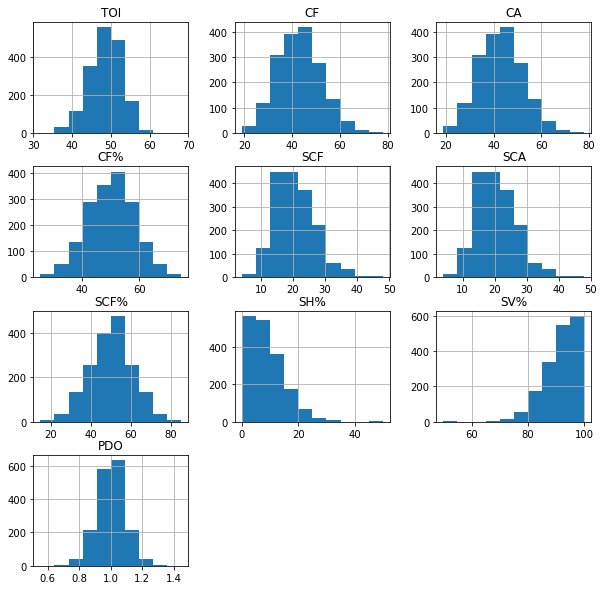

In [ ]:
hist= data.hist(bins=10, figsize=(10,10))

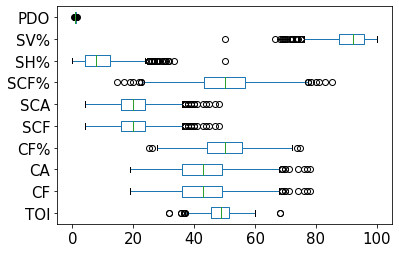

In [ ]:
boxplot = data.boxplot(grid=False, vert=False,fontsize=15)

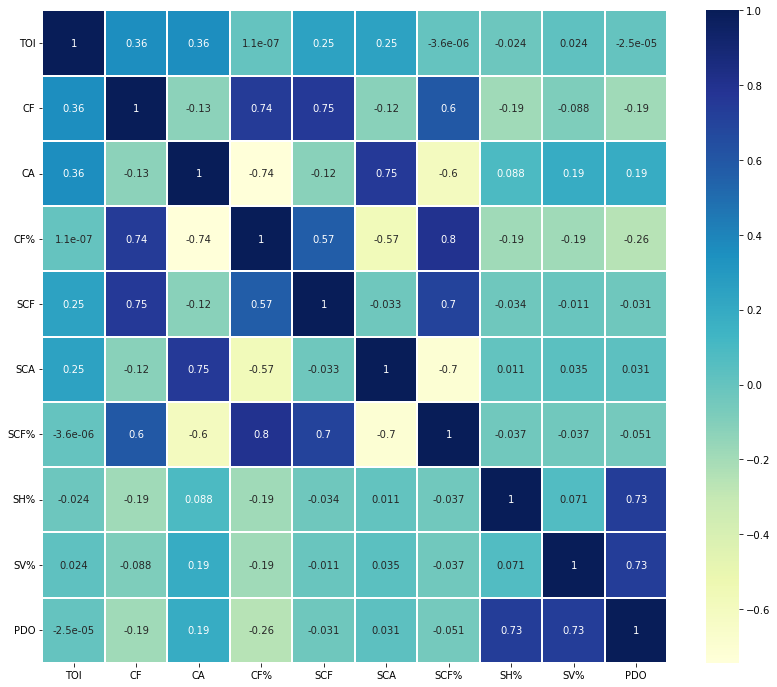

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

# Task 2: Analysis Pipeline 

In [ ]:
df = data.drop(columns = ['CF', 'CA' , 'SCF' , 'SCA' , 'Unnamed: 2']) 
df
#test = sns.violinplot(x="CF%", y="Team", data=df)

,Game,Team,TOI,CF%,SCF%,SH%,SV%,PDO
0,"2021-01-13 - Blackhawks 1, Lightning 5",Chicago Blackhawks,45.583333,49.25,44.19,0.00,86.36,0.864
1,"2021-01-13 - Blackhawks 1, Lightning 5",Tampa Bay Lightning,45.583333,50.75,55.81,13.64,100.00,1.136
2,"2021-01-13 - Blues 4, Avalanche 1",Colorado Avalanche,50.683333,50.57,33.33,0.00,85.19,0.852
3,"2021-01-13 - Blues 4, Avalanche 1",St Louis Blues,50.683333,49.43,66.67,14.81,100.00,1.148
4,"2021-01-13 - Canadiens 4, Maple Leafs 5",Montreal Canadiens,48.600000,47.47,45.45,9.09,90.00,0.991
...,...,...,...,...,...,...,...,...
1731,"2021-05-16 - Flames 6, Canucks 5",Vancouver Canucks,40.966667,39.02,47.22,8.70,78.26,0.870
1732,"2021-05-18 - Flames 2, Canucks 4",Calgary Flames,47.416667,53.75,59.52,3.33,86.36,0.897
1733,"2021-05-18 - Flames 2, Canucks 4",Vancouver Canucks,47.416667,46.25,40.48,13.64,96.67,1.103
1734,"2021-05-19 - Canucks 2, Flames 6",Calgary Flames,44.483333,55.13,62.50,24.00,94.44,1.184


##
- I have decided to drop the columns of CF,CA,SCF,SCA, and Unnamed: 2 as many of our stats are combined to produce a percentage, which will be more useful.
- I have also decided to rename the column stats with their division name after to be able to differentiate between divisional stats when running analysis.

# North Division (Calgary, Edmonton, Montreal, Toronto, Winnipeg, Ottawa, Vancouver) 

Montreal Canadiens     56
Toronto Maple Leafs    56
Edmonton Oilers        56
Vancouver Canucks      56
Calgary Flames         56
Winnipeg Jets          56
Ottawa Senators        56
Name: Team, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


,Game,TOI,CF%,SCF%,SH%,SV%,PDO,Division
0,"2021-01-13 - Canadiens 4, Maple Leafs 5",48.600000,47.47,45.45,9.09,90.00,0.991,North
1,"2021-01-13 - Canadiens 4, Maple Leafs 5",48.600000,52.53,54.55,10.00,90.91,1.009,North
2,"2021-01-13 - Canucks 5, Oilers 3",47.583333,41.76,45.83,12.00,83.87,0.959,North
3,"2021-01-13 - Canucks 5, Oilers 3",47.583333,58.24,54.17,16.13,88.00,1.041,North
4,"2021-01-14 - Canucks 2, Oilers 5",44.550000,44.14,45.28,8.33,93.33,1.017,North
...,...,...,...,...,...,...,...,...
387,"2021-05-16 - Flames 6, Canucks 5",40.966667,39.02,47.22,8.70,78.26,0.870,North
388,"2021-05-18 - Flames 2, Canucks 4",47.416667,53.75,59.52,3.33,86.36,0.897,North
389,"2021-05-18 - Flames 2, Canucks 4",47.416667,46.25,40.48,13.64,96.67,1.103,North
390,"2021-05-19 - Canucks 2, Flames 6",44.483333,55.13,62.50,24.00,94.44,1.184,North


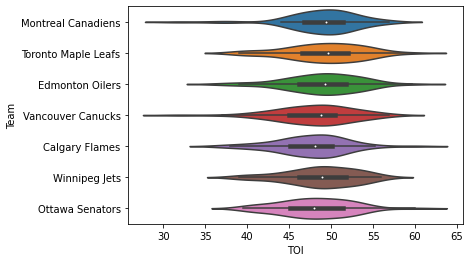

In [22]:
northdiv1 = df.drop(data[data.Team.isin([ "Arizona Coyotes", "Buffalo Sabres", "Boston Bruins", "Carolina Hurricanes", "Columbus Blue Jackets", 
                                        "Chicago Blackhawks", "Colorado Avalanche", "Dallas Stars", "Detroit Red Wings", "Florida Panthers",
                                        "Los Angeles Kings", "Minnesota Wild", "Nashville Predators", "Pittsburgh Penguins", "San Jose Sharks", "Tampa Bay Lightning",
                                        "St Louis Blues", "Vegas Golden Knights", "New Jersey Devils", "New York Islanders", "New York Rangers", "Philadelphia Flyers", 
                                        "Washington Capitals", "Anaheim Ducks"])].index)
northdiv = northdiv1.reset_index()
print(northdiv['Team'].value_counts()) # I do this to double check that I have the correct temas selected and they each played 56 regular season games.
print(sns.violinplot(x="TOI", y="Team", data=northdiv))
northdiv = northdiv.drop(columns = ['Team', 'index'])
northdiv['Division']='North'
#northdiv = northdiv.rename(columns={'TOI':'TOI North','CF%':'CF% North','SCF%':'SCF% North' , 'SH%' : 'SH% North', 'SV%': 'SV% North' ,'PDO' : 'PDO North'}) 
#northdiv =northdiv.describe()#[['mean', 'min', 'max']]
#northdiv = northdiv.drop(['count'], axis= 0 )
northdiv
                         


<AxesSubplot:>

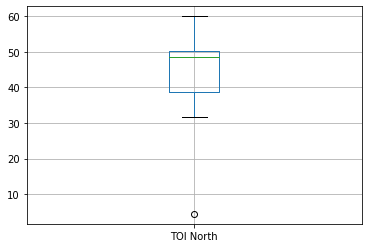

In [ ]:
northdiv.boxplot(['TOI North'])

<AxesSubplot:>

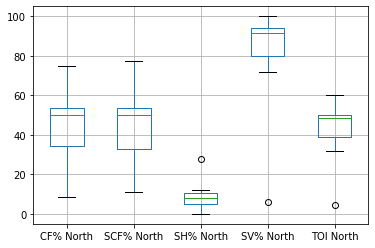

In [ ]:
northdiv.boxplot(['CF% North','SCF% North','SH% North','SV% North','TOI North'])


# East Division (Pittsburgh, Washington, Boston, NY Islanders, NY Rangers, Philadelphia, New Jersey, Buffalo)

In [20]:
eastdiv1 = df.drop(data[data.Team.isin(["Arizona Coyotes", "Carolina Hurricanes", "Columbus Blue Jackets", "Calgary Flames", "Chicago Blackhawks", "Colorado Avalanche", 
                                       "Dallas Stars", "Detroit Red Wings", "Florida Panthers", "Los Angeles Kings", "Minnesota Wild", "Nashville Predators", "San Jose Sharks", 
                                       "Tampa Bay Lightning", "St Louis Blues", "Vegas Golden Knights", "Edmonton Oilers", "Montreal Canadiens","Ottawa Senators",
                                       "Toronto Maple Leafs", "Winnipeg Jets", "Anaheim Ducks", "Vancouver Canucks",])].index)
eastdiv = eastdiv1.reset_index()
print(eastdiv['Team'].value_counts())
eastdiv = eastdiv.drop(columns = ['Team', 'index'])
eastdiv['Division']='East'
eastdiv
#eastdiv =eastdiv.rename(columns={'TOI':'TOI East','CF%':'CF% East','SCF%':'SCF% East' , 'SH%' : 'SH% East', 'SV%': 'SV% East' ,'PDO' : 'PDO  East'}) 
#eastdiv =eastdiv.describe().T#[['mean', 'min', 'max']]

Philadelphia Flyers    56
Pittsburgh Penguins    56
Boston Bruins          56
New Jersey Devils      56
Buffalo Sabres         56
Washington Capitals    56
New York Islanders     56
New York Rangers       56
Name: Team, dtype: int64


,Game,TOI,CF%,SCF%,SH%,SV%,PDO,Division
0,"2021-01-13 - Penguins 3, Flyers 6",51.933333,44.19,48.65,18.18,93.33,1.115,East
1,"2021-01-13 - Penguins 3, Flyers 6",51.933333,55.81,51.35,6.67,81.82,0.885,East
2,"2021-01-14 - Bruins 3, Devils 2",43.366667,55.56,56.76,0.00,85.71,0.857,East
3,"2021-01-14 - Bruins 3, Devils 2",43.366667,44.44,43.24,14.29,100.00,1.143,East
4,"2021-01-14 - Capitals 6, Sabres 4",51.316667,51.47,55.17,10.53,80.95,0.915,East
...,...,...,...,...,...,...,...,...
443,"2021-05-10 - Devils 2, Flyers 4",47.066667,54.26,61.36,13.04,91.30,1.043,East
444,"2021-05-10 - Islanders 2, Bruins 3",45.850000,65.00,68.29,3.23,94.12,0.973,East
445,"2021-05-10 - Islanders 2, Bruins 3",45.850000,35.00,31.71,5.88,96.77,1.027,East
446,"2021-05-11 - Bruins 1, Capitals 2",56.516667,37.50,33.33,4.00,93.33,0.973,East


# Central Division (Carolina, Florida, Tampa Bay, Nashville, Dallas, Chicago, Detroit, Columbus) 

In [23]:
centdiv1 = df.drop(data[data.Team.isin(["Arizona Coyotes", "Buffalo Sabres", "Boston Bruins", "Calgary Flames","Colorado Avalanche"
                                        ,"Los Angeles Kings", "Minnesota Wild","Pittsburgh Penguins", "San Jose Sharks", "St Louis Blues", "Vegas Golden Knights",
                                        "Edmonton Oilers", "Montreal Canadiens", "New Jersey Devils", "New York Islanders", 
                                        "New York Rangers", "Ottawa Senators", "Philadelphia Flyers", "Toronto Maple Leafs",
                                        "Winnipeg Jets", "Washington Capitals", "Anaheim Ducks", "Vancouver Canucks"])].index)
centdiv = centdiv1.reset_index()
print(centdiv['Team'].value_counts())
centdiv = centdiv.drop(columns = ['Team', 'index'])
centdiv['Division']='Central'
centdiv
#centdiv = centdiv.rename(columns={'TOI':'TOI Central','CF%':'CF% Central','SCF%':'SCF% Central' , 'SH%' : 'SH% Central', 'SV%': 'SV% Central' ,'PDO' : 'PDO Central'}) 
#centdiv = centdiv.describe().T#[['mean', 'min', 'max']]
#centdiv.boxplot(['CF%'])
#cd = sns.violinplot(x="TOI", y="PDO", data=centdiv)

Chicago Blackhawks       56
Tampa Bay Lightning      56
Columbus Blue Jackets    56
Nashville Predators      56
Carolina Hurricanes      56
Detroit Red Wings        56
Florida Panthers         56
Dallas Stars             56
Name: Team, dtype: int64


,Game,TOI,CF%,SCF%,SH%,SV%,PDO,Division
0,"2021-01-13 - Blackhawks 1, Lightning 5",45.583333,49.25,44.19,0.00,86.36,0.864,Central
1,"2021-01-13 - Blackhawks 1, Lightning 5",45.583333,50.75,55.81,13.64,100.00,1.136,Central
2,"2021-01-14 - Blue Jackets 1, Predators 3",49.050000,48.04,45.45,4.00,92.59,0.966,Central
3,"2021-01-14 - Blue Jackets 1, Predators 3",49.050000,51.96,54.55,7.41,96.00,1.034,Central
4,"2021-01-14 - Hurricanes 3, Red Wings 0",50.266667,66.67,64.58,2.86,100.00,1.029,Central
...,...,...,...,...,...,...,...,...
443,"2021-05-10 - Hurricanes 0, Predators 5",45.883333,49.25,64.86,5.88,100.00,1.059,Central
444,"2021-05-10 - Lightning 0, Panthers 4",38.083333,46.38,44.00,15.79,100.00,1.158,Central
445,"2021-05-10 - Lightning 0, Panthers 4",38.083333,53.62,56.00,0.00,84.21,0.842,Central
446,"2021-05-10 - Stars 5, Blackhawks 4",50.666667,28.13,17.07,30.77,92.50,1.233,Central


# West Division (Colorado, Vegas, Minnesota, St. Louis, Arizona, Los Angeles, San Jose, Anaheim) 

In [30]:
westdiv1= df.drop(data[data.Team.isin(["Buffalo Sabres", "Boston Bruins", "Carolina Hurricanes", 
                                        "Columbus Blue Jackets", "Calgary Flames", "Chicago Blackhawks",  "Dallas Stars", "Detroit Red Wings", "Florida Panthers",
                                       "Nashville Predators", "Pittsburgh Penguins","Tampa Bay Lightning","Edmonton Oilers", "Montreal Canadiens",
                                        "New Jersey Devils", "New York Islanders", "New York Rangers", "Ottawa Senators", 
                                        "Philadelphia Flyers", "Toronto Maple Leafs", "Winnipeg Jets", "Washington Capitals","Vancouver Canucks"])].index)
westdiv= westdiv1.reset_index()
print(westdiv['Team'].value_counts())
westdiv= westdiv.drop(columns = ['Team','index'])
westdiv['Division']='West'
#westdiv = westdiv.rename(columns={'TOI':'TOI West','CF%':'CF% West','SCF%':'SCF% West' , 'SH%' : 'SH% West', 'SV%': 'SV% West' ,'PDO' : 'PDO West'}) #REMOVE THIS WE DONT NEED IT
#westdiv = westdiv.describe().T#[['mean', 'min', 'max']]
#westdiv = westdiv['Division'] = "West Division"
westdiv
#westdiv.boxplot()
#wd = sns.violinplot(x="SV%", y="SH%", data=westdiv)


Colorado Avalanche      56
St Louis Blues          56
Anaheim Ducks           56
Vegas Golden Knights    56
Arizona Coyotes         56
San Jose Sharks         56
Los Angeles Kings       56
Minnesota Wild          56
Name: Team, dtype: int64


,Game,TOI,CF%,SCF%,SH%,SV%,PDO,Division
0,"2021-01-13 - Blues 4, Avalanche 1",50.683333,50.57,33.33,0.00,85.19,0.852,West
1,"2021-01-13 - Blues 4, Avalanche 1",50.683333,49.43,66.67,14.81,100.00,1.148,West
2,"2021-01-14 - Ducks 2, Golden Knights 5",53.483333,51.16,42.86,11.11,84.62,0.957,West
3,"2021-01-14 - Ducks 2, Golden Knights 5",53.483333,48.84,57.14,15.38,88.89,1.043,West
4,"2021-01-14 - Sharks 4, Coyotes 3",44.833333,51.55,62.26,4.17,92.31,0.965,West
...,...,...,...,...,...,...,...,...
443,"2021-05-12 - Wild 0, Blues 4",52.000000,46.15,45.24,12.00,100.00,1.120,West
444,"2021-05-13 - Kings 1, Avalanche 5",53.683333,69.03,75.86,9.76,95.00,1.048,West
445,"2021-05-13 - Kings 1, Avalanche 5",53.683333,30.97,24.14,5.00,90.24,0.952,West
446,"2021-05-13 - Wild 3, Blues 7",50.450000,46.88,54.84,15.79,77.78,0.936,West


<AxesSubplot:>

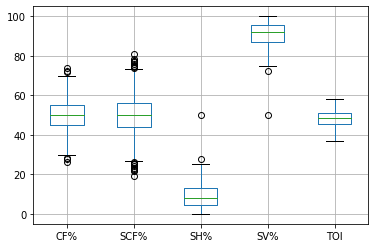

In [31]:
 westdiv.boxplot(['CF%','SCF%','SH%','SV%','TOI'])

## All Divisons

In [24]:
data_frames = [northdiv, centdiv, eastdiv, westdiv] 
alldivisions = pd.concat([northdiv, centdiv, eastdiv,westdiv], axis=0)
alldivisions

,Game,TOI,CF%,SCF%,SH%,SV%,PDO,Division
0,"2021-01-13 - Canadiens 4, Maple Leafs 5",48.600000,47.47,45.45,9.09,90.00,0.991,North
1,"2021-01-13 - Canadiens 4, Maple Leafs 5",48.600000,52.53,54.55,10.00,90.91,1.009,North
2,"2021-01-13 - Canucks 5, Oilers 3",47.583333,41.76,45.83,12.00,83.87,0.959,North
3,"2021-01-13 - Canucks 5, Oilers 3",47.583333,58.24,54.17,16.13,88.00,1.041,North
4,"2021-01-14 - Canucks 2, Oilers 5",44.550000,44.14,45.28,8.33,93.33,1.017,North
...,...,...,...,...,...,...,...,...
443,"2021-05-12 - Wild 0, Blues 4",52.000000,46.15,45.24,12.00,100.00,1.120,West
444,"2021-05-13 - Kings 1, Avalanche 5",53.683333,69.03,75.86,9.76,95.00,1.048,West
445,"2021-05-13 - Kings 1, Avalanche 5",53.683333,30.97,24.14,5.00,90.24,0.952,West
446,"2021-05-13 - Wild 3, Blues 7",50.450000,46.88,54.84,15.79,77.78,0.936,West


<AxesSubplot:xlabel='Division', ylabel='PDO'>

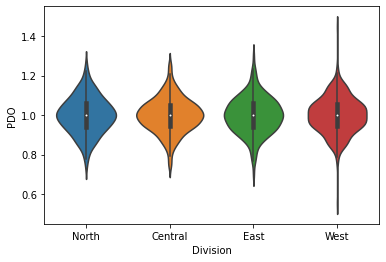

In [32]:
sns.violinplot(x='Division', y='PDO', data=alldivisions)